In [1336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1337]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters


In [1338]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [1339]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [1340]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A,cache

In [1341]:
def relu(Z):
    A = np.maximum(0,Z)
    cache = Z
    return A,cache

In [1342]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [1343]:
def L_model_forward(X,parameters):
    caches = []
    A = X
    L = len(parameters)//2
    
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(cache)
    AL, cahce = linear_activation_forward(A_prev,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    AL = AL.reshape((10,X.shape[1]))
    caches.append(cache)
    assert(AL.shape==(10,X.shape[1]))
    return AL,caches

In [1344]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    
    cost = np.squeeze(cost)
    cost = cost.reshape((1,100))
    assert(cost.shape == (1,100))
    
    return cost


In [1345]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


In [1346]:
def sigmoid_backward(dA,cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA*s*(1-s)
    return dZ

In [1347]:
def relu_backward(dA,cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    return dZ

In [1348]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


In [1349]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


In [1350]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters


In [1351]:
import pickle
batch1 = {}
batch2 = {}
batch3 = {}
batch4 = {}
batch5 = {}
batch6 = {}
infile = open('/home/khalaq04/Downloads/nnfs_dataset/batches.meta','rb')
batches = pickle.load(infile)
infile.close()
batch1.update(batches)
batch2.update(batches)
batch3.update(batches)
batch4.update(batches)
batch5.update(batches)
batch6.update(batches)
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_1','rb')
batch = pickle.load(infile)
batch1.update(batch)
infile.close()
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_2','rb')
batch = pickle.load(infile)
batch2.update(batch)
infile.close()
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_3','rb')
batch = pickle.load(infile)
batch3.update(batch)
infile.close()
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_4','rb')
batch = pickle.load(infile)
batch4.update(batch)
infile.close()
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_5','rb')
batch = pickle.load(infile)
batch5.update(batch)
infile.close()
infile = open('/home/khalaq04/Downloads/nnfs_dataset/data_batch_6','rb')
batch = pickle.load(infile)
batch6.update(batch)
infile.close()
ds_train = [batch1,batch2,batch3,batch4,batch5]
print(ds_train)

[{'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072, b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4

In [1352]:
X_train = np.array(ds_train[0][b'data'])#+ds_train[1][b'data']+ds_train[2][b'data']+ds_train[3][b'data']+ds_train[4][b'data'])
X_train = np.append(X_train,ds_train[1][b'data'],axis=0)
X_train = np.append(X_train,ds_train[2][b'data'],axis=0)
X_train = np.append(X_train,ds_train[3][b'data'],axis=0)
X_train = np.append(X_train,ds_train[4][b'data'],axis=0)
Y_train = np.array(ds_train[0][b'labels']+ds_train[1][b'labels']+ds_train[2][b'labels']+ds_train[3][b'labels']+ds_train[4][b'labels'])
X_train = X_train/255

print(X_train)
print(X_train.shape)
print(Y_train)
Y_train = Y_train.reshape((1,50000))
Y_train.shape
train_target = Y_train

[[0.23921569 0.17254902 0.18823529 ... 0.7372549  0.48627451 0.38823529]
 [0.67058824 0.52156863 0.40392157 ... 0.53333333 0.5372549  0.5372549 ]
 [1.         0.98823529 0.98823529 ... 0.32156863 0.32156863 0.3254902 ]
 ...
 [0.55294118 0.55686275 0.55686275 ... 0.18431373 0.14901961 0.10588235]
 [0.81176471 0.8        0.79607843 ... 0.7254902  0.74117647 0.74117647]
 [0.90196078 0.92941176 0.9254902  ... 0.69411765 0.63921569 0.63529412]]
(50000, 1024)
[6 9 9 ... 9 1 1]


In [1353]:
ds_test = [batch6]
print(ds_test)

[{'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072, b'batch_label': b'testing batch 1 of 1', b'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7,

In [1354]:
X_test = np.array(ds_test[0][b'data'])
Y_test = np.array(ds_test[0][b'labels'])
X_test = X_test/255

print(X_test)
print(X_test.shape)
print(Y_test)
Y_test = Y_test.reshape((1,10000))
Y_test.shape
test_target = Y_test

[[0.4627451  0.4627451  0.48235294 ... 0.25882353 0.28627451 0.22352941]
 [0.92156863 0.90196078 0.90980392 ... 0.69411765 0.74509804 0.76470588]
 [0.71764706 0.70980392 0.62745098 ... 0.01960784 0.01568627 0.02745098]
 ...
 [0.0627451  0.05882353 0.05098039 ... 0.10196078 0.10588235 0.09411765]
 [0.1254902  0.10196078 0.12941176 ... 0.42745098 0.42745098 0.41960784]
 [0.29803922 0.4        0.40784314 ... 0.43921569 0.25490196 0.10196078]]
(10000, 1024)
[3 8 8 ... 5 1 7]


In [1355]:
multi_class = np.zeros([9,50000],dtype=int)
Y_train = np.append(Y_train,multi_class,axis=0)
print(Y_train)
print(Y_train.shape)

multi_class = np.zeros([9,10000],dtype=int)
Y_test = np.append(Y_test,multi_class,axis=0)
print(Y_test)
print(Y_test.shape)

for i in range(0,50000):
    y = Y_train[0][i]
    Y_train[0][i]=0
    Y_train[y][i]=1
print(Y_train)
print(Y_train.shape)

for i in range(0,10000):
    y = Y_test[0][i]
    Y_test[0][i]=0
    Y_test[y][i]=1
print(Y_test)
print(Y_test.shape)

[[6 9 9 ... 9 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 50000)
[[3 8 8 ... 5 1 7]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 1 0 0]]
(10, 50000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 10000)


In [1356]:
X_train_final = X_train.T
X_test_final = X_test.T
print(X_train_final.shape)
print(X_test_final.shape)

(1024, 50000)
(1024, 10000)


In [1357]:
layers_dims = [1024, 20, 10, 10, 10]

In [1358]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.075, num_iterations=600, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost[0][j]))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693150
Cost after iteration 100: 0.340447
Cost after iteration 200: 0.325526
Cost after iteration 300: 0.325094
Cost after iteration 400: 0.325084
Cost after iteration 500: 0.325083


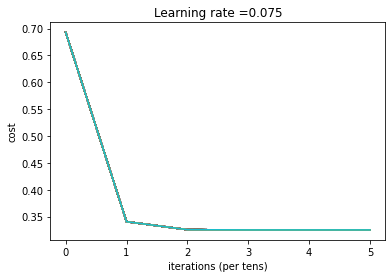

In [1359]:
parameters = L_layer_model(X_train_final, Y_train, layers_dims, num_iterations=600, print_cost=True)

In [1364]:
def predict(X, Y, parameters):
    m = X.shape[1]
    n = len(parameters)//2
    predictions = np.zeros((10,m))
    final_predictions = np.zeros((1,m))
    test = np.zeros((1,m))
    prob, caches = L_model_forward(X,parameters)
    max_index = prob.argmax(axis=0)
    for i in range(0,len(max_index)):
        predictions[max_index[i]][i]=1
    for i in range(0,10):
        for j in range(0,m):
            if predictions[i][j]==1:
                final_predictions[0][j]=i
    for i in range(0,m):
        if Y[0][i]==final_predictions[0][i]:
            test[0][i]=1
    accuracy = 100 - (np.sum(test,axis=1)*100/m)
    return accuracy

In [1370]:
pred_train = predict(X_train_final, train_target, parameters)
print("Training Accuracy = "+str(pred_train[0])+"%")

Training Accuracy = 88.928%


In [1371]:
pred_test = predict(X_test_final, test_target, parameters)
print("Test Accuracy = "+str(pred_test[0])+"%")

Test Accuracy = 88.75%
